**Problem Statement:**  
*We have customers data.*  
*We are trying to predict whether or not give loan to a customer.*
  
  
***Banking Terms:***  
**Asset**  
Something that gives profit.  
Housing loan, personal loan, vehicle loan, educational loan etc.   
are asset because here bank gives money like 1000 but the customer have to return 1200 as 200 is interest which is a profit for the bank.  
  
**Liabilities**   
Something that does not give profit and is a reason for loss.  
Current Account, Savings Acount, Fixed Deposit etc.  
are liabilities because here bank have to give interest for your money like for your 1000 bank gives 1200 which is a loss for bank but profit for you.  
  
  
***Asset for bank is liability for customer and vise-versa.***


**Distributed Amount**  
Loan amount that is given to a customer.  
  
**OSP - Out Standing Principle**  
The left unpaid amount out of a loan amount. If loan is of 1 lakh and 40k is paid then 60k is OSP. OSP should be 0 at the end of the loan cycle.  
  
**DPD - Days Past Due**  
No. of days the payment of an EMI is delayed after the due date. If due date is 10 Apr and Payment is done on 12 Apr then DPD is 2. DPD should be 0.  
  
**PAR - Portfolio At Risk**  
OSP when DPD > 0.  
  
**NPA - Non Performing Asset**  
NPA - Loan that is defaulted i.e. not paid.  
Loan account when DPD > 90.  

In [1]:
 # Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os

In [2]:
# Load the dataset
a1 = pd.read_excel("case_study1.xlsx")
a2 = pd.read_excel("case_study2.xlsx")

In [3]:
df1 = a1.copy()
df2 = a2.copy()

In [4]:
df1

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [5]:
df2

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [6]:
# Remove nulls - -99999 is considered as null values.
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [7]:
to_be_removed = []
for i in df1.columns:
    if -99999 in df1[i].values:
        to_be_removed.append(i)
to_be_removed
# No column with null value present

[]

In [8]:
#Since the number of null values in df2 is very large, we are checking the number of null values in each column.
# if it is greater than 10000 then we simply delete the column.
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)

In [9]:
columns_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [10]:
len(columns_to_be_removed)

8

In [11]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [12]:
# removing the other null value rows where each column has null values less than 10000
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [13]:
df2.shape

(42066, 54)

In [14]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)

PROSPECTID


In [15]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )
df

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0.0,0.0,0.000,0.0,1,0,PL,PL,696,P2
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,1,0,ConsumerLoan,others,693,P2
3,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0.0,0.0,0.000,0.0,0,0,AL,AL,753,P1
4,6,6,5,1,0,0,0.000,0.00,0.167,0.833,...,1.0,0.0,0.429,0.0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,ConsumerLoan,650,P4
42060,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,others,others,702,P1
42061,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,1.0,0.0,1.000,0.0,0,0,ConsumerLoan,others,661,P3
42062,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0.0,0.0,0.000,0.0,0,0,ConsumerLoan,others,686,P2


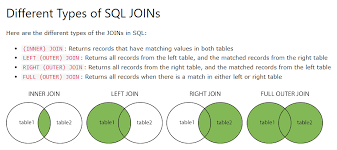

In [16]:
from IPython.display import Image, display

# Load the image file
image_path = 'sql_joins.png'  # Replace with your image file path

# Display the image
display(Image(filename=image_path, width=500, height=300))

In [17]:
df.isna().sum().sum() # total number of null values in dataset

0

In [18]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


**Hypothesis Testing**    
MaritalStatus and Approved_Flag  
1. Null Hypothesis(H0)
2. Alternate Hypothesis(H1)
3. Alpha(assumed)  
    Significance Level  
    Strictness Level  
    Margin Error  
    5% or 0.05  
    can be 0.00001 depending on the case is even a single error is critical and can't be ignored.
4. Confidence Interval  
    1 - alpha
5. Calculate the evidence against H0  
    p - value  
    Calculated using test  
        T-test, Chi-square, Anova  
    Degree of Freedom
6. p - value <= alpha  
    reject H0  
   p - value > alpha  
    Fail to reject H0  
    
**CHI-SQUARE TEST** -> Categorical and Categorical  
         **T-TEST** -> Categorical and Numerical (2 categories)  
     **ANOVA TEST** -> Categorical and Numerical (>=3 categories)  

In [19]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


Since all the categorical features have p-value <= 0.05, we will accept all

**Multicollinearity** -> Predictability of each feature by other features.  

**Among Multicollinearity and Correlation for checking the relation among the cols always use Multicollinearity as correlation is specific to linear relationship between columns and hence not used.**

For Calculating/finding the multicollenearity of a column we calculate VIF for each col.

In [20]:
# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [21]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

C:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


C:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


C:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646739
3 --- 5.581352009642762
4 --- 1.985584353098778


C:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.064658415523423
8 --- 2.898639771299253
9 --- 4.377876915347324
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


C:\Users\ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427232
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.6241227524040112
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824577
20 --- 2.62339755352723
21 --- 2.2959970812106176
22 --- 7.360578319196439
22 --- 2.1602387773102554
23 --- 2.8686288267891458
24 --- 6.458218003637277
24 --- 2.8474118865638265
25 --- 4.753198156284083
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808687
26 --- 2.3804746142952653
27 --- 8.609513476514548
27 --- 13.06755093547673
27 --- 3.500040056654654
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512906
31 --- 3.4241712032176985
32 --- 10.175021454450935
32 --- 6.408710354561301
32 --- 1.001151196262561
33 --- 3.069197305397274
34 --- 2.8091261600643715
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.833164974053

In [22]:
df.shape

(42064, 79)

In [23]:
len(columns_to_be_kept)

39

The above columns are columns whose VIF value <= 6 hence less multicollinearity occurs among them.

In [24]:
# check Anova for columns_to_be_kept to find the associated columns with the Target col.

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [25]:
len(columns_to_be_kept_numerical)

37

In [26]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

In [27]:
df.shape

(42064, 43)

Here our output column classes are in order P1, P2, P3, P4. P1 is the best possible condition for a person to give loan from bank and so on. In other words, output is ordinal.

In [28]:
# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

In [29]:
df['MARITALSTATUS'].unique()    

array(['Married', 'Single'], dtype=object)

In [30]:
df['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

In [31]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [32]:
df['last_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'AL', 'CC', 'others', 'HL'], dtype=object)

In [33]:
df['first_prod_enq2'].unique()

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [34]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3

# We can do ordinal encoding only for the Education column rest all are not order related col so we apply one hot there
# Others has to be verified by the business end user

In [35]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [36]:
df['EDUCATION']

0        2
1        3
2        1
3        4
4        2
        ..
42059    2
42060    1
42061    1
42062    3
42063    1
Name: EDUCATION, Length: 42064, dtype: object

In [37]:
df['EDUCATION'].value_counts()

EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64

In [38]:
df['EDUCATION'] = df['EDUCATION'].astype(int)
df['EDUCATION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 42064 entries, 0 to 42063
Series name: EDUCATION
Non-Null Count  Dtype
--------------  -----
42064 non-null  int32
dtypes: int32(1)
memory usage: 164.4 KB


C:\Users\ankit\AppData\Local\Temp\ipykernel_20020\546928674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EDUCATION'] = df['EDUCATION'].astype(int)


In [39]:
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

Now df_encoded is my final dataset which has all the columns needed and encoded

In [40]:
df_encoded

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.00,0,0.000,0,0,0,4,1,4,...,False,False,True,False,False,False,False,False,True,False
1,0.000,0.00,0,0.000,0,0,0,0,0,1,...,True,False,False,False,False,False,True,False,False,False
2,0.125,0.00,0,0.000,1,0,0,0,2,6,...,True,False,False,False,False,False,False,False,False,True
3,0.000,0.00,0,0.000,0,0,0,0,3,0,...,False,False,False,False,True,False,False,False,False,False
4,0.000,0.00,1,0.167,0,0,0,0,6,0,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,...,True,False,False,False,False,False,True,False,False,False
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,...,False,False,False,True,False,False,False,False,False,True
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,...,True,False,False,False,False,False,False,False,False,True
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,...,True,False,False,False,False,False,False,False,False,True


In [41]:
df_encoded.info()
k = df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [42]:
# Display all the columns
pd.pandas.set_option('display.max_columns',None)

In [43]:
df_encoded

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION,Approved_Flag,MARITALSTATUS_Married,MARITALSTATUS_Single,GENDER_F,GENDER_M,last_prod_enq2_AL,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.000,0.00,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0,2,P2,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
1,0.000,0.00,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0,3,P2,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False
2,0.125,0.00,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0,1,P2,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
3,0.000,0.00,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0,4,P1,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
4,0.000,0.00,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0,2,P3,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42059,0.333,0.00,0,0.000,0,0,0,0,0,3,1,24,5,15,24,0,0,0,0,0,0,0,0,0,24,0,0,0,1,18500,249,0,0,0.000,0.0,0,0,2,P4,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False
42060,0.000,0.25,1,0.250,0,0,0,0,2,2,0,74,7,57,0,0,0,6,0,0,0,0,0,0,0,0,0,203,0,25000,186,0,0,0.000,0.0,0,0,1,P1,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True
42061,0.500,0.50,1,0.500,0,0,0,0,0,2,0,9,5,32,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,18000,66,0,0,1.000,0.0,0,0,1,P3,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
42062,0.000,0.00,1,0.500,0,0,0,0,0,2,0,15,8,58,0,0,0,0,0,0,0,0,0,0,0,0,0,242,0,12802,54,0,0,0.000,0.0,0,0,3,P2,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True


## Machine Learing model fitting

### Data processing

**1. Random Forest**

In [44]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [47]:
y_pred = rf_classifier.predict(x_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)


# The below loop is to examin the performance of each class of output column separately.
for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.7636990372043266

Class p1:
Precision: 0.8370457209847597
Recall: 0.7041420118343196
F1 Score: 0.7648634172469202

Class p2:
Precision: 0.7957519116397621
Recall: 0.9282457879088206
F1 Score: 0.856907593778591

Class p3:
Precision: 0.4423380726698262
Recall: 0.21132075471698114
F1 Score: 0.28600612870275793

Class p4:
Precision: 0.7178502879078695
Recall: 0.7269193391642371
F1 Score: 0.7223563495895703



**2. xgboost**

In [49]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [50]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

In [51]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [52]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [100]:
y_encoded

array([1, 1, 1, ..., 2, 1, 1])

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [54]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.78

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



**3. Decision Tree** 

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()


Accuracy: 0.71

Class p1:
Precision: 0.7195715676728335
Recall: 0.7287968441814595
F1 Score: 0.7241548260656541

Class p2:
Precision: 0.8116591928251121
Recall: 0.8251734390485629
F1 Score: 0.818360526833104

Class p3:
Precision: 0.3525691699604743
Recall: 0.3366037735849057
F1 Score: 0.3444015444015444

Class p4:
Precision: 0.655241935483871
Recall: 0.6316812439261419
F1 Score: 0.6432459178624443



Now we will fine tune XgBoost

In [61]:
# Apply standard scaler 

from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

In [62]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)

In [63]:
y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

In [64]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

In [66]:
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [67]:
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Class p1:
Precision: 0.823906083244397
Recall: 0.7613412228796844
F1 Score: 0.7913890312660175

Class p2:
Precision: 0.8255418233924413
Recall: 0.913577799801784
F1 Score: 0.8673315769665035

Class p3:
Precision: 0.4756380510440835
Recall: 0.30943396226415093
F1 Score: 0.37494284407864653

Class p4:
Precision: 0.7342386032977691
Recall: 0.7356656948493683
F1 Score: 0.7349514563106796



No improvement in metrics

In [68]:
# # Hyperparameter tuning for xgboost (Used in the session)

# # Define the hyperparameter grid
# param_grid = {
#   'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
#   'learning_rate'   : [0.001, 0.01, 0.1, 1],
#   'max_depth'       : [3, 5, 8, 10],
#   'alpha'           : [1, 10, 100],
#   'n_estimators'    : [10,50,100]
# }

# index = 0

# answers_grid = {
#     'combination'       :[],
#     'train_Accuracy'    :[],
#     'test_Accuracy'     :[],
#     'colsample_bytree'  :[],
#     'learning_rate'     :[],
#     'max_depth'         :[],
#     'alpha'             :[],
#     'n_estimators'      :[]

#     }


# # Loop through each combination of hyperparameters
# for colsample_bytree in param_grid['colsample_bytree']:
#   for learning_rate in param_grid['learning_rate']:
#     for max_depth in param_grid['max_depth']:
#       for alpha in param_grid['alpha']:
#           for n_estimators in param_grid['n_estimators']:
             
#               index = index + 1
             
#               # Define and train the XGBoost model
#               model = xgb.XGBClassifier(objective='multi:softmax',  
#                                        num_class=4,
#                                        colsample_bytree = colsample_bytree,
#                                        learning_rate = learning_rate,
#                                        max_depth = max_depth,
#                                        alpha = alpha,
#                                        n_estimators = n_estimators)
               
       
                     
#               y = df_encoded['Approved_Flag']
#               x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

#               label_encoder = LabelEncoder()
#               y_encoded = label_encoder.fit_transform(y)


#               x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


#               model.fit(x_train, y_train)
  

       
#               # Predict on training and testing sets
#               y_pred_train = model.predict(x_train)
#               y_pred_test = model.predict(x_test)
       
       
#               # Calculate train and test results
              
#               train_accuracy =  accuracy_score (y_train, y_pred_train)
#               test_accuracy  =  accuracy_score (y_test , y_pred_test)
              
              
       
#               # Include into the lists
#               answers_grid ['combination']   .append(index)
#               answers_grid ['train_Accuracy']    .append(train_accuracy)
#               answers_grid ['test_Accuracy']     .append(test_accuracy)
#               answers_grid ['colsample_bytree']   .append(colsample_bytree)
#               answers_grid ['learning_rate']      .append(learning_rate)
#               answers_grid ['max_depth']          .append(max_depth)
#               answers_grid ['alpha']              .append(alpha)
#               answers_grid ['n_estimators']       .append(n_estimators)
       
       
#               # Print results for this combination
#               print(f"Combination {index}")
#               print(f"colsample_bytree: {colsample_bytree}, learning_rate: {learning_rate}, max_depth: {max_depth}, alpha: {alpha}, n_estimators: {n_estimators}")
#               print(f"Train Accuracy: {train_accuracy:.2f}")
#               print(f"Test Accuracy : {test_accuracy :.2f}")
#               print("-" * 30)

In [69]:
# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.7811719957209081


### Predict for unseen data

In [92]:
a3 = pd.read_excel('Unseen_Dataset.xlsx')

In [93]:
a3

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000,0.0,0,0.000,0,0,0,1,1,5,2,43,8,68,60,0,0,11,0,0,0,0,0,0,60,0,0,27,1,32000,107,0,1,0.000,0.0,0,0,Married,GRADUATE,M,ConsumerLoan,others
96,0.222,0.0,2,0.222,0,0,0,0,1,8,0,76,3,39,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1,15000,30,0,0,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,others
97,0.000,0.0,0,0.000,0,0,0,0,1,0,0,9,9,72,0,0,0,0,0,0,0,0,0,0,0,0,0,266,0,25000,62,0,0,0.000,0.0,0,0,Married,SSC,M,others,others
98,0.000,1.0,1,1.000,0,0,0,0,1,0,0,29,29,176,0,0,0,0,0,0,0,0,0,0,0,0,0,796,0,25000,180,0,0,0.000,0.0,0,0,Married,12TH,M,others,others


In [107]:
df.shape

(42064, 43)

In [94]:
cols_in_df = list(df.columns)

In [95]:
cols_in_df

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag',
 'MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [98]:
cols_in_df.pop(42)

'Approved_Flag'

In [99]:
# Dropping the dropped columns of our dataset from unseen dataset.
df_unseen = a3[cols_in_df]
df_unseen

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,0,72,18,549,29,0,0,11,0,0,0,0,0,0,29,0,0,566,0,51000,114,0,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,0,7,7,47,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,19000,50,0,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,0,47,2,302,25,8,0,10,0,0,0,0,0,0,25,0,0,587,0,18,191,0,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,2,131,32,583,0,0,0,16,0,0,0,0,0,0,0,0,0,3951,0,15000,75,0,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,0,150,17,245,270,0,11,2,3,0,1,0,0,0,26,1,3,7,4,0,154,0,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000,0.0,0,0.000,0,0,0,1,1,5,2,43,8,68,60,0,0,11,0,0,0,0,0,0,60,0,0,27,1,32000,107,0,1,0.000,0.0,0,0,Married,GRADUATE,M,ConsumerLoan,others
96,0.222,0.0,2,0.222,0,0,0,0,1,8,0,76,3,39,0,0,0,0,0,0,0,0,0,0,0,0,0,21,1,15000,30,0,0,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,others
97,0.000,0.0,0,0.000,0,0,0,0,1,0,0,9,9,72,0,0,0,0,0,0,0,0,0,0,0,0,0,266,0,25000,62,0,0,0.000,0.0,0,0,Married,SSC,M,others,others
98,0.000,1.0,1,1.000,0,0,0,0,1,0,0,29,29,176,0,0,0,0,0,0,0,0,0,0,0,0,0,796,0,25000,180,0,0,0.000,0.0,0,0,Married,12TH,M,others,others


In [77]:
df_unseen['MARITALSTATUS'].unique()    

array(['Married', 'Single'], dtype=object)

In [78]:
df_unseen['EDUCATION'].unique() 

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS'], dtype=object)

In [79]:
df_unseen['GENDER'].unique() 

array(['M', 'F'], dtype=object)

In [80]:
df_unseen['last_prod_enq2'].unique() 

array(['PL', 'ConsumerLoan', 'AL', 'CC', 'others', 'HL'], dtype=object)

In [81]:
df_unseen['first_prod_enq2'].unique() 

array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [83]:
df_unseen.loc[df_unseen['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df_unseen.loc[df_unseen['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df_unseen.loc[df_unseen['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df_unseen.loc[df_unseen['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df_unseen.loc[df_unseen['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df_unseen.loc[df_unseen['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df_unseen.loc[df_unseen['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [84]:
df_unseen['EDUCATION'].value_counts()

EDUCATION
3    41
2    28
1    26
4     5
Name: count, dtype: int64

In [85]:
df_unseen['EDUCATION'] = df_unseen['EDUCATION'].astype(int)
df_unseen['EDUCATION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: EDUCATION
Non-Null Count  Dtype
--------------  -----
100 non-null    int32
dtypes: int32(1)
memory usage: 532.0 bytes


In [86]:
df_encoded_unseen = pd.get_dummies(df_unseen, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])

In [87]:
df_encoded_unseen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               100 non-null    float64
 1   pct_tl_closed_L6M             100 non-null    float64
 2   Tot_TL_closed_L12M            100 non-null    int64  
 3   pct_tl_closed_L12M            100 non-null    float64
 4   Tot_Missed_Pmnt               100 non-null    int64  
 5   CC_TL                         100 non-null    int64  
 6   Home_TL                       100 non-null    int64  
 7   PL_TL                         100 non-null    int64  
 8   Secured_TL                    100 non-null    int64  
 9   Unsecured_TL                  100 non-null    int64  
 10  Other_TL                      100 non-null    int64  
 11  Age_Oldest_TL                 100 non-null    int64  
 12  Age_Newest_TL                 100 non-null    int64  
 13  time_s

In [90]:
df_encoded.describe()

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,CC_enq_L12m,PL_enq_L12m,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,4.206400e+04,4.206400e+04,4.206400e+04,4.206400e+04,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.00000,42064.000000,42064.000000,4.206400e+04,42064.000000,42064.000000,4.206400e+04,42064.000000,4.206400e+04,4.206400e+04,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,0.179032,0.097783,0.825504,0.160365,0.525746,0.145921,0.076241,0.328000,2.921334,2.341646,1.116489,-6.250019e-17,2.500008e-17,-5.447652e-18,1.435815e-18,0.336963,0.438879,3.279978,0.063831,0.002211,0.009224,0.02451,0.004279,0.016713,5.405422e-18,0.268924,0.779194,3.783795e-17,1.230458,4.375014e-17,-3.310821e-17,0.102962,0.193063,0.195497,0.064186,0.252235,0.056580,2.313689
std,0.278043,0.210957,1.537208,0.258831,1.106442,0.549314,0.358582,0.916368,6.379764,3.405397,2.486801,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.097356,2.148400,7.566312,0.799989,0.081704,0.220786,0.62189,0.184461,0.573762,1.000012e+00,1.019459,1.802092,1.000012e+00,2.069461,1.000012e+00,1.000012e+00,0.303913,0.394707,0.367414,0.225989,0.434300,0.231042,0.871070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.104238e+00,-7.417080e-01,-5.129368e-01,-2.648152e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.542767e-01,0.000000,0.000000,-5.676515e-01,0.000000,-1.292051e+00,-1.459039e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.717657e-01,-5.293370e-01,-3.968993e-01,-2.648152e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.542767e-01,0.000000,0.000000,-5.483621e-01,0.000000,-4.284413e-01,-6.524711e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-2.968048e-01,-3.700588e-01,-3.495371e-01,-2.648152e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.542767e-01,0.000000,0.000000,-3.983341e-01,1.000000,-1.405715e-01,-2.425758e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.333000,0.100000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000,4.393846e-01,1.077758e-01,-1.719287e-01,1.267659e-02,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.731778e-02,0.000000,1.000000,7.961236e-02,2.000000,1.952767e-01,2.730989e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,33.000000,1.000000,34.000000,27.000000,10.000000,29.000000,235.000000,55.000000,80.000000,8.038759e+00,1.831859e+01,1.384492e+01,1.638469e+01,20.000000,52.000000,122.000000,41.000000,5.000000,12.000000,35.00000,12.000000,72.000000,1.913328e+01,24.000000,44.000000,9.651401e+00,42.000000,1.186537e+02,1.202784e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [91]:
model = xgb.XGBClassifier(objective='multi-softmax',
                         num_class = 4,
                         colsample_bytree = 0.9,
                         learning_rate = 0.2,
                         max_depth = 3, n_estimators = 200
                         )

In [104]:
df_encoded.shape

(42064, 55)

In [105]:
df_encoded_unseen.shape

(100, 54)

In [106]:
x_train.shape

(33651, 54)

In [111]:
y_train.shape

(33651,)

In [112]:
y_train

array([0, 0, 1, ..., 2, 2, 0])

In [102]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

In [113]:
y_pred_unseen = model.predict(df_encoded_unseen)

In [114]:
a3['Target_Variables'] = y_pred_unseen

In [115]:
a3.to_excel('Final_Predictions.xlsx')

In [116]:
y_pred_model = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_model)
accuracy

0.782241768691311